# Import Libraries

In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 
# Read Data

In [784]:
df = pd.read_excel('games-regression-dataset.xlsx')

In [785]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",2018-06-03 00:00:00,31/07/2019,4.0
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",2013-04-04 00:00:00,21/04/2015,4.5
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,2019-06-02 00:00:00,4.5


In [786]:
df.shape

(5214, 18)

# 
# Preprocessing Pipeline
- **`1. Analysis Columns Data Type`**
- **`2. Columns Nulls`**
- **`3. Rows Nulls`**
- **`4. Duplicates`**
- **`5. Outlires Detection & Removal`**

## 
### `1. Analysis Columns Data Type`

In [787]:
df.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
User Rating Count                 int64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                              int64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
Average User Rating             float64
dtype: object

> <br> 
> 
> **Age Rating**
> - Remove + sign 
> - Convert to int
> - Notice that the column has only 4 ages so we can categorize them

In [788]:
df['Age Rating'] = df['Age Rating'].str.replace('+', '', regex=False)

In [789]:
print(df['Age Rating'].dtype)

object


In [790]:
df['Age Rating'] = df['Age Rating'].astype(int)

In [791]:
print(df['Age Rating'].dtype)

int64


In [792]:
df['Age Rating'].unique()

array([12,  4,  9, 17])

In [793]:
# Create a dictionary to map the age ratings to integers
age_rating_map = {4: 1, 9: 2, 12: 3, 17: 4}

In [794]:
# Replace the age rating column with its corresponding integer value
df['Age Rating'] = df['Age Rating'].replace(age_rating_map)

In [795]:
df['Age Rating'].head()

0    3
1    3
2    1
3    2
4    3
Name: Age Rating, dtype: int64

In [796]:
df['Age Rating'].dtype

dtype('int64')

> <br>
> 
> **Languages**

In [797]:
df['Languages'].head()

0    EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI
1                                        EN
2                                    EN, ZH
3                                        EN
4                                        EN
Name: Languages, dtype: object

In [798]:
print(df['Languages'].dtype)

object


In [799]:
all_languages = list(set(','.join(df['Languages'].fillna('').unique()).split(',')))

In [800]:
len(all_languages)

130

> <br>
> 
> **Genre**

In [801]:
df['Genres'].nunique()

507

> ## 
> **Dates**
> - Convert to date time data type

In [802]:
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'])
print(df['Original Release Date'].dtype)

datetime64[ns]


<ipython-input-802-a485047d5374>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Original Release Date'] = pd.to_datetime(df['Original Release Date'])


In [803]:
df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'])
print(df['Current Version Release Date'].dtype)

datetime64[ns]


<ipython-input-803-4ddc8edb4d6a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'])


In [804]:
df['Original Release Date'].head()

0   2018-06-03
1   2013-03-21
2   2013-04-04
3   2011-05-26
4   2017-05-19
Name: Original Release Date, dtype: datetime64[ns]

## 
### `2. Columns Nulls`

In [805]:
# print count of nulls for each column and percentage of them
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().mean())*100})
missing_data

,total_missing,perc_missing
URL,0,0.000000
ID,0,0.000000
Name,0,0.000000
Subtitle,3749,71.902570
Icon URL,0,0.000000
User Rating Count,0,0.000000
Price,0,0.000000
In-app Purchases,2039,39.106252
Description,5,0.095896
Developer,0,0.000000


In [806]:
df.drop(columns=['Subtitle'], inplace=True)

In [807]:
# print count of nulls for each column and percentage of them
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().mean())*100})
missing_data

,total_missing,perc_missing
URL,0,0.000000
ID,0,0.000000
Name,0,0.000000
Icon URL,0,0.000000
User Rating Count,0,0.000000
Price,0,0.000000
In-app Purchases,2039,39.106252
Description,5,0.095896
Developer,0,0.000000
Age Rating,0,0.000000



> <br> 
> 
> **In-app Purchases**
> - We can assum that any cell with null value, does not has any purshases. So replace all nulls with 0

In [808]:
df['In-app Purchases'] = df['In-app Purchases'].fillna(0)

In [809]:
# print count of nulls for each column and percentage of them
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().mean())*100})
missing_data

,total_missing,perc_missing
URL,0,0.000000
ID,0,0.000000
Name,0,0.000000
Icon URL,0,0.000000
User Rating Count,0,0.000000
Price,0,0.000000
In-app Purchases,0,0.000000
Description,5,0.095896
Developer,0,0.000000
Age Rating,0,0.000000


<br>

### `3. Rows Nulls`

In [810]:
df.shape

(5214, 17)

In [811]:
missing_rows = df.isnull().any(axis=1).sum()
missing_rows

16

In [812]:
df.dropna(inplace=True)

In [813]:
df.shape

(5198, 17)

In [814]:
missing_rows = df.isnull().any(axis=1).sum()
missing_rows

0

<br>

## `4. Duplicates`

In [815]:
print(df.duplicated().sum())

43


In [816]:
df.drop_duplicates(inplace = True, keep="first")

In [817]:
df.shape

(5155, 17)

<br>

## `5. Outlires Detection & Removal`

In [818]:
df.describe()

,ID,User Rating Count,Price,Age Rating,Size,Average User Rating
count,5.155000e+03,5.155000e+03,5155.000000,5155.000000,5.155000e+03,5155.000000
mean,8.681007e+08,3.689626e+03,0.604425,1.639767,1.381700e+08,4.035403
std,2.941689e+08,5.005629e+04,2.563789,0.884046,2.537722e+08,0.749439
min,2.849214e+08,5.000000e+00,0.000000,1.000000,2.158400e+05,1.000000
25%,5.953934e+08,1.300000e+01,0.000000,1.000000,2.750362e+07,3.500000
50%,9.193940e+08,4.900000e+01,0.000000,1.000000,6.706074e+07,4.000000
75%,1.115636e+09,3.320000e+02,0.000000,2.000000,1.588076e+08,4.500000
max,1.341837e+09,3.032734e+06,139.990000,4.000000,4.005591e+09,5.000000


In [819]:
# calculate the interquartile range (IQR)
col = 'Price'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1

# identify the outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# print the outliers
print("Outliers in User Rating Count column:")
print(outliers[col].head())

Outliers in User Rating Count column:
3    1.99
4    3.99
5    0.99
7    9.99
8    0.99
Name: Price, dtype: float64


In [820]:
df["Languages"]=df["Languages"].str.split(",")
df=df.explode('Languages')


In [821]:
df["In-app Purchases"]=df["In-app Purchases"].str.split(",")
df=df.explode('In-app Purchases')
df['In-app Purchases']=df['In-app Purchases'].astype(float)
df['In-app Purchases'] = df['In-app Purchases'].fillna(0)

<Axes: ylabel='Size'>

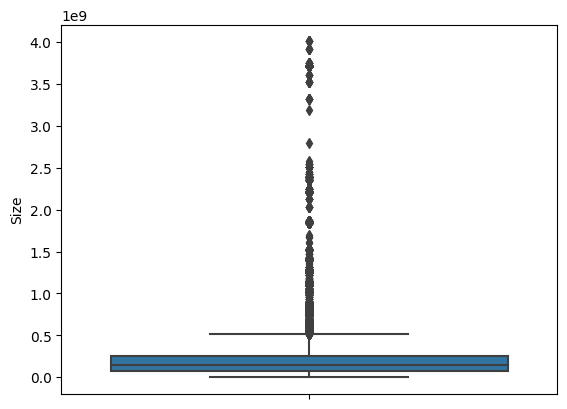

In [822]:
#convert size to gigabyte

sns.boxplot( y='Size', data=df)


In [823]:
percentile25 = df["Size"].quantile(0.25)
percentile75 = df["Size"].quantile(0.75)
iqr=percentile75-percentile25

In [824]:
def outliers(dataset,col):
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(dataset)):
      if dataset[col].iloc[i] > upper_bound:
          dataset[col].iloc[i] = upper_bound
      if dataset[col].iloc[i] < lower_bound:
          dataset[col].iloc[i] = lower_bound
outliers(df,"Size")          

<ipython-input-824-32f735cf3130>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col].iloc[i] = upper_bound


<Axes: ylabel='Size'>

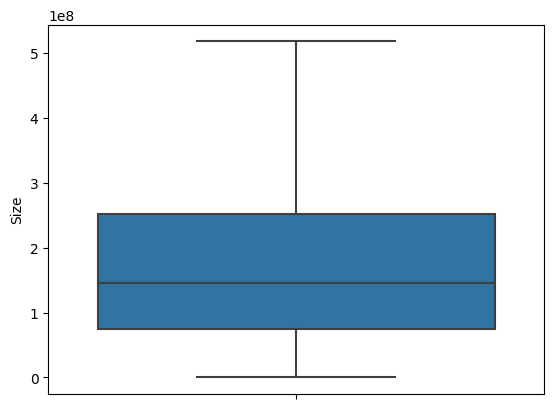

In [826]:
sns.boxplot( y='Size', data=df)